# Project: Investigate a Dataset - [No_Show_Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset records, amongst other variables, the scheduled doctor's appointment date of over 100,000 patients, and seeks to know whether or not patients show up for their appointment. A number of records for individual patient are included on each row under the the following variables:
1. **PatientID:** Unique ID of a patient.
2. **AppointmentID:** Unique ID of each appointment.
3. **Gender:** Tells if the patient is male or female.
4. **ScheduledDay:** Tells us what 
5. **AppointmentDay:** The actual day of the appointment.
6. **Age:** The age of the patient.
7. **Neighbourhood:** Where the hospital is located.
8. **Scholarship:** A set of boolean result(0 or 1) that tells whether or not a patient is under the Brasilian scholarship.
9. **Hypertension:** Boolean results(0 or 1) that tells whether or not a patient is hypertensive.
10. **Diabetes:** Boolean results(0 or 1) that tells whether or not a patient is diabetic.
11. **Alcoholism:** Boolean results(0 or 1) that tells whether or not a patient is an alcoholic.
12. **Handcap:** Boolean results(0 or 1) that tells whether or not a patient is handicap.
13. **SMS_received:** 1 or more messages sent to the patient as a reminder for the appointment day.
14. **No_show:** Boolean results(Yes or No) that tells whether a patient showed up for their appointment.




### Question(s) for Analysis
Two questions will be answered in the course of investigating this dataset:

**Question 1:** What age group show up for their appointment mostly?

**Question 2:** Do patients under the Brasiilian scholarship show up for their appointment more than those who are not?


In [1]:
# import all packages to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.4MB/s eta 0:00:01   36% |███████████▊                    | 3.8MB 28.2MB/s eta 0:00:01    49% |███████████████▉                | 5.2MB 28.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01  7% |██▍                             | 1.0MB 26.8MB/s eta 0:00:01    25% |████████▎                       | 3.5MB 24.1MB/s eta 0:00:01    43% |██████████████                  | 5.8MB 26.6MB/s eta 0:00:01    52% |████████████████▉               | 7.1MB 25.5MB/s eta 0:00:01    80% |█████████████████████████▊      | 10.8MB 24.8MB/s eta 0:00:01    96% |██████████████████████████████▊ | 12.9MB 23.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully unins

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines. 
df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check for data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Data Cleaning

### Change column names



In [4]:
# change column names
df = df.rename(columns = {'No-show':'No_show', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'PatientId': 'PatientID'})
df

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Columns names like _Hipertension_ and _Handcap_ that were wrongly spelt were corrected. _No-show_ was renamed to _No_show_ to maintain the consistency of the usage of underscore("_").


### Convert to appropriate datatypes

1. Convert PatientID, AppointmentID to strings

In [5]:
# convert PatientID, AppointmentID to strings
df['PatientID'] = df['PatientID'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)

# confirm changes
df['PatientID'].dtype
df['AppointmentID'].dtype


dtype('O')

2. Check for unique values in _Hypertension_, _Diabetes_, _Alcoholism_,  _Handicap_, _Scholarship_ and _Age_ to determine whether their data types should be changed.

In [6]:
df.Hypertension.unique()

array([1, 0])

In [7]:
df.Diabetes.unique()

array([0, 1])

In [8]:
df.Alcoholism.unique()

array([0, 1])

In [9]:
df.Handicap.unique()

array([0, 1, 2, 3, 4])

In [10]:
df.Scholarship.unique()

array([0, 1])

In [11]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

_Hypertension_, _Diabetes_,  _Alcoholism_ and _Schorlarship_ show unique values which represent Bools; indicating that a patient is either hypertensive, diabetic, an alcoholic, or not; or whether or not a patient is under the Brasilian scholarship. Therefore, we convert the datatypes to strings.

Each of the unique values(0, 1, 2, 3, 4) contained in _Handicap_ may represent different types/nature of handicapping situations.

In [12]:
df.Hypertension = df.Hypertension.astype(str)
df.Diabetes = df.Diabetes.astype(str)
df.Alcoholism = df.Alcoholism.astype(str)
df.Scholarship = df.Scholarship.astype(str)
df.Handicap = df.Handicap.astype(str)

In [13]:
# Confirm that datatype changes have been successfully implemented

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null object
Hypertension      110527 non-null object
Diabetes          110527 non-null object
Alcoholism        110527 non-null object
Handicap          110527 non-null object
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: int64(2), object(12)
memory usage: 11.8+ MB


In the arrays of the unique values for _Age_, there is -1, which is a less than 0 years. This is an errant data within the context of this dataset.
I will therefore drop the row where _Age_ is recorded as -1

In [14]:
# drop row where _Age_ is -1

errant = df.query('Age == -1')
df.drop(errant.index, inplace=True)

In [15]:
# confirm that the row has been dropped

df.query('Age == -1')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


After the removal of the row where _Age_ was recorded as -1, there are now 110526 rows, 14 columns and no nulls or missing data in the dataframe.

3. Using a primary key, which in this dataframe is the _AppointmentID_, check that no patient's record was repeated in several rows. To confirm it's distinctness, the number of unique values should tally with the number of rows in the dataframe.

In [16]:
# Check for number of unique values in AppointmentID

df.AppointmentID.nunique()

110526

There are obviously no repeated records of appointment.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What Age grade show up for their appointment mostly?)

To do this, the ages of the patients would be grouped into different categories/Age_groups 

In [17]:
# Use the describe function to get the minimum and maximum value in _Age_

df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

_Age_ will therefore be categorized using the following groupings:

 0 - 18(Children),
19 - 44(Youths),
45 - 64(Middle_Aged),
65 - 84(Elderly),
85 - 115(Long_Livers)

In [18]:
# To group ages into different age grades, create bin edges that will be used to "cut" the _Age_ column into groups
bin_edges =  [0, 19, 45, 65, 85, 115]

In [19]:
# labels for the five age groups

bin_names =  ['Children', 'Youths', 'Middle_Aged', 'Elderly', 'Long_Livers']

In [20]:
# create age_group columns

df['Age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names)
df.head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group
0,2.98724998243e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Middle_Aged
1,5.58997776694e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle_Aged


In [21]:
# use the query() function to request for the dataframe of patients who showed up for their appointment
df_show = df.query('No_show == "Yes"')

df_show

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group
6,7.33688164477e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Youths
7,3.44983339412e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Youths
11,7.54295136844e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,Youths
17,1.47949661912e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes,Youths
20,6.22257462899e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,Youths
21,1.21548437528e+13,5628338,F,2016-04-27T10:50:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,Yes,Children
22,8.63229818888e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes,Children
31,311284853849.0,5628907,M,2016-04-27T12:07:14Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,Children
44,274164858852.0,5635414,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,Elderly
48,8.54541517699e+12,5618643,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,Middle_Aged


In [22]:
# use the groupby() function to aggregate patients who showed up for their appointment by age groups

Agegroup_show_count = df_show.groupby('Age_group')['No_show'].count()
Agegroup_show_count

Age_group
Children       6102
Youths         8441
Middle_Aged    5071
Elderly        1871
Long_Livers     195
Name: No_show, dtype: int64

Creating bar charts to make comparisons will be inevitable during the course of this exploratory analysis. For this cause, it will be important to define a function, to prevent repetitive codes.

In the next cell, I will be defining a bar chart function:

In [23]:
def barchartFunction(DataFrame, title, xlabel, ylabel):
    DataFrame.plot(kind='bar')
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.show()

## Visualization for Question 1

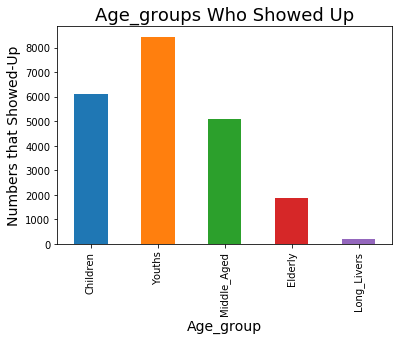

In [24]:
# Create a bar chart(with defined function) that shows the Age_group with the most number that showed up for their appointment.

barchartFunction(Agegroup_show_count, 'Age_groups Who Showed Up', 'Age_group', 'Numbers that Showed-Up')

 The Visualization of **Age_groups Who Showed Up** doesn't appear to be a fair comparison; as there's such a wide difference between the 'Showed-Up' number of every other _Age_group_ and the Long_livers. 

 Let's make use of a histogram to check the _Age_ distribution across the population sample. This will help tell if the the bar chart above makes a fair comparison of the numbers of each _Age_group_ that showed up.

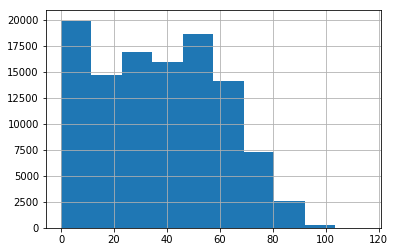

In [25]:
# view histogram for _Age_ column in df

df.Age.hist()

The histogram above shows a right-skewed distribution of ages. The graph shows that Elderly(patients within the ages of 65 - 84) and Long_Livers(patients within the ages of 85 - 115) are not well represented in the population sample; as they make up a small portion of the sample.

To create a fair comparison, we find the proportion of each Age_group(that is, we divide each count of Age_group that showed up for their appointment by their total count in the original dataframe:

In [26]:
# Calculate the total number found in each Age_group from the dataset, df

Agegroup_total = df.groupby('Age_group')['PatientID'].count()
Agegroup_total

Age_group
Children       26872
Youths         37174
Middle_Aged    29640
Elderly        12141
Long_Livers     1160
Name: PatientID, dtype: int64

In [27]:
# proportion of Children who showed up for their appointments.

Children_proportion = Agegroup_show_count['Children'] / Agegroup_total['Children']
Children_proportion

0.22707651086632927

In [28]:
# proportion of Youths who showed up for their appointments.

Youths_proportion = Agegroup_show_count['Youths'] / Agegroup_total['Youths']
Youths_proportion

0.22706730510571904

In [29]:
# proportion of Middle_Aged who showed up for their appointments.

Middle_Aged_proportion = Agegroup_show_count['Middle_Aged'] / Agegroup_total['Middle_Aged']
Middle_Aged_proportion

0.17108636977058031

In [30]:
# proportion of Elderly who showed up for their appointments

Elderly_proportion = Agegroup_show_count['Elderly'] / Agegroup_total['Elderly']
Elderly_proportion

0.15410592208220081

In [31]:
# proportion of Long_Livers who showed up for their appointments.

Long_Livers_proportion = Agegroup_show_count['Long_Livers'] / Agegroup_total['Long_Livers']
Long_Livers_proportion

0.16810344827586207

## Visualization Showing the Different Proportion of Age_groups that Showed Up

Text(0,0.5,'Proportion that Showed-Up')

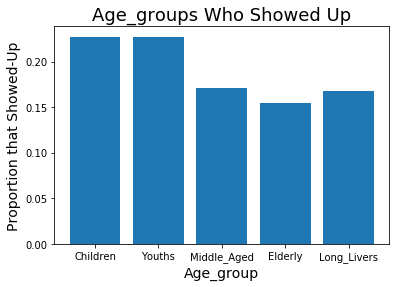

In [32]:
# Create a bar chart showing the different proportion of Age_groups that showed up

Location = [1, 2, 3, 4, 5]
Height = [0.22707651086632927, 0.22706730510571904 , 0.17108636977058031, 0.15410592208220081, 0.16810344827586207]
label = ['Children', 'Youths', 'Middle_Aged', 'Elderly', 'Long_Livers']
plt.bar(Location, Height, tick_label=label)
plt.title('Age_groups Who Showed Up', fontsize=18)
plt.xlabel('Age_group', fontsize=14)
plt.ylabel('Proportion that Showed-Up', fontsize=14)

From the visualization above, Children and Youths are the Age_groups which showed up the most for their appointments.
Unlike the preceding visualization where Age_group was plotted against numbers that showed up and Long_Livers showed uup the least, in this visualization, it is seen that, in proportion to their total population, Long_Livers show up for their appointment more than the Elderly.

### Question 2  (Do patients under the Brazilian Scholarship show up for their appointment more than those who are not?)

From the **df_show** dataframe(which contains data for all patients who showed up for their appointment) created earlier, I am going to draw information about the number of patients under the Brazilian scholarship(and those who are not), who showed up for their appointments

In [33]:
df_show.query('Scholarship == "1"').shape[0]

2578

In [34]:
df_show.query('Scholarship == "0"').shape[0]

19741

In [35]:
# Count of patients under the Brasilian scholarship and those who aren't

df_show_count = df_show.groupby('Scholarship')['No_show'].count()
df_show_count

Scholarship
0    19741
1     2578
Name: No_show, dtype: int64

Patients under the scholarship have the boolean result "1", while those who are not under the scholarship have the boolean result "0"

### Visualization for Recipients and Non-Recipients of The Brasilian Scholarship who Showed-Up 

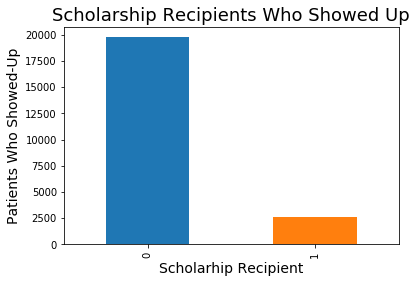

In [36]:
# Create a bar chart to compare the number of recipients of the scholarship who showed up to that of the non-recipients who
# showed up

barchartFunction(df_show_count, 'Scholarship Recipients Who Showed Up', 'Scholarhip Recipient', 'Patients Who Showed-Up')

The bar chart above shows that the number of non-recipients of the scholarship(indicated by tick_label "0") who showed up for their appointment is about 17,000 more than scholarship recipients(indicated by tick_label "1") who showed up. This can be misleading in the sense that, out of a sample of patients of about 110,000, about 90% are patients who are not under the scholarship.

Therefore to make fair the comparison, we'll find the proportion of both recipients and non-recipients of the scholarship:

In [37]:
# First, we find the dataframe of patients who did not show up for their appointment

df_noshow = df.query('No_show == "No"')
df_noshow

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group
0,2.98724998243e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Middle_Aged
1,5.58997776694e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle_Aged
2,4.26296229995e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Middle_Aged
3,867951213174.0,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,8.84118644818e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Middle_Aged
5,9.59851332313e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,Elderly
8,5.639472995e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,Youths
9,7.81245643693e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,Children
10,7.34536231958e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No,Youths
12,5.66654781423e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No,Youths


In [38]:
# Next, we count the number of recipients and non-recipients of the scholarship using the groupby() and count() functions

df_noshow_count = df_noshow.groupby('Scholarship')['No_show'].count()
df_noshow_count

Scholarship
0    79924
1     8283
Name: No_show, dtype: int64

To get the proportion of scholarship recipients who showed up for their appointment and the proportion of non-recipients who showed up for their appointment:

First, we calculate the total number of non-recipients:


In [39]:
# total number of patients without scholarship

total = df_show_count[0] + df_noshow_count[0]
total

99665

Next, we calculate the proportion of people who without a scholarship still showed up for their appointment

In [40]:
# proportion of non-recipients who showed up for their appointment

no_scholarship_proportion = df_show_count[0] / total
no_scholarship_proportion


0.19807354638037425

Secondly, we calculate the total number of recipients:

In [41]:
# total number of patients without scholarship

total_scholarship = df_show_count[1] + df_noshow_count[1]
total_scholarship

10861

Next, we calculate the proportion of people who are under the scholarship and showed up for their appointment

In [42]:
# proportion of recipients who  showed up for their appointment

scholarship_proportion =  df_show_count[1] / total_scholarship
scholarship_proportion

0.23736304207715681

## Visualization for Question 2

Text(0,0.5,'Scholarship Proportion')

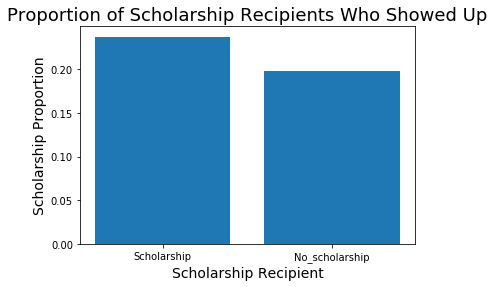

In [43]:
# Create a bar_chart with proper labels showing the proportions of recipients and non-recipients of the scholarship who showed up

Scholarship = 0.237
No_scholarship = 0.198

Location = [1, 2]
Height = [0.237, 0.198]
label = ['Scholarship', 'No_scholarship']
plt.bar(Location, Height, tick_label=label)
plt.title('Proportion of Scholarship Recipients Who Showed Up', fontsize=18)
plt.xlabel('Scholarship Recipient', fontsize=14)
plt.ylabel('Scholarship Proportion', fontsize=14)

From the bar chart above, it is seen that, in proportion to their respective number in the entire sample, patients under the Brasilian scholarship show up for their appointment more than those who are not.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


  In conclusion, based on the data provided in this dataset, more Children(persons between 0 - 18 years) and Youths(persons between 19 - 44 years) show up more for their appointment. This could be because, the age-bracket of most parents, whose children fall under 0 - 18 years, is found within the Age_group of Youths(as categorized in this dataset). And knowing that a parent's responsibility(including health-wise) is mostly towards their children. However, additional information can be provided to tell if there is an existing relationship between patients.

  Also, based on records provided in this dataset, more people who are enrolled in the Brasilian welfare program(Bolsa Familia) showed up more for their appointments, compared to those who are not enrolled in the program. Maybe if eligibility conditions for been enrolled are made less stringent, more people might show up for their doctor's appointment.
  
  However, there are limitations in this dataset. One of which is that, the dataset contains records of more than half of the patients with more than one appointment ID. Here are code cells run to dtermine this:


In [44]:
# number of unique PatientID

df.PatientID.nunique()

62298

In [45]:
# number of unique AppointmentID

df.AppointmentID.nunique()

110526

The output of the code cells above shows that more than half of individual patients had an appointment with a doctor more than once. This could have a varying impact on the dataset in the sense that, the reasons for individual patients showing up for their appointments or not might differ for a different appointmentID. This would in turn affect the analysis.

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255